In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8],[8, 8], [1, 0.6], [9, 11]])

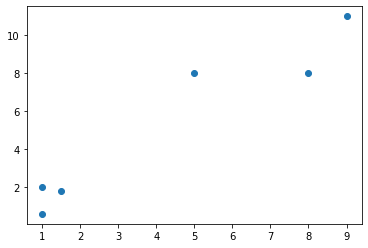

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [6]:
k_means = KMeans(n_clusters = 2)

In [7]:
k_means.fit(X)

KMeans(n_clusters=2)

In [9]:
k_means.labels_

array([0, 0, 1, 1, 0, 1])

In [11]:
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

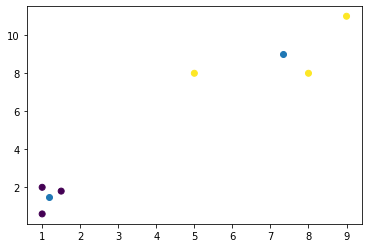

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1])
plt.show()

In [32]:
def fit(data, k=2, max_iter=100):
    means = []
    #Randomly initialize the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        #assign the data points to the cluster they belong to 
        #create empty cluster
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            #find distance to all the mean values
            distances=[((point-m)**2).sum() for m in means]
            #find min distance
            minDistance = min(distances)
            #find the mean for which we got min distance
            l = distances.index(minDistance)
            #add this point to distance l
            clusters[l].append(point)
        
        #calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis=0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means

In [33]:
def predict(test_data, means):
    predictions = []
    for point in test_data:
        #find distance to all the mean values
        distances=[((point-m)**2).sum() for m in means]
        #find min distance
        minDistance = min(distances)
        #find the mean for which we got min distance
        l = distances.index(minDistance)
        #add this point to cluster l
        predictions.append(l)
    return predictions
                
    

In [36]:
means =fit(X)

In [37]:
predict(X, means)

[0, 0, 1, 1, 0, 1]